In [8]:
!pip install sentence_transformers
# !pip install umap-learn[plot]
# !pip install cohere

  Using cached sentence_transformers-2.5.1-py3-none-any.whl.metadata (11 kB)
  Using cached transformers-4.38.2-py3-none-any.whl.metadata (130 kB)
  Using cached tokenizers-0.15.2-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.7 kB)
  Using cached safetensors-0.4.2-cp311-cp311-macosx_11_0_arm64.whl.metadata (3.8 kB)
Using cached sentence_transformers-2.5.1-py3-none-any.whl (156 kB)
Using cached transformers-4.38.2-py3-none-any.whl (8.5 MB)
Using cached safetensors-0.4.2-cp311-cp311-macosx_11_0_arm64.whl (393 kB)
Using cached tokenizers-0.15.2-cp311-cp311-macosx_11_0_arm64.whl (2.4 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.13.3
    Uninstalling tokenizers-0.13.3:
      Successfully uninstalled tokenizers-0.13.3
  Attempting uninstall: transformers
    Found existing installation: transformers 4.27.1
    Uninstalling transformers-4.27.1:
      Successfully uninstalled transformers-4.27.1


In [ ]:
!nvidia-smi


Wed Mar  6 07:54:01 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [1]:
import torch
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")

tensor([1.], device='mps:0')


In [4]:
os.listdir('ds')

['.DS_Store',
 'labelled_Sustainable_Urban_Mobility_data_03_No_Undesirable.csv',
 'labelled_Sustainable_Urban_Mobility_data_01_No_Undesirable.csv',
 'labelled_Sustainable_Urban_Mobility_data_02_No_Undesirable.csv',
 'labelled_Smart_City_data_01_No_Undesirable.csv',
 'labelled_Smart_City_data_02_No_Undesirable.csv',
 'labelled_Contradictory_Sustainable_Urban_Mobility_data_No_Undesirable.csv']

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('ds'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

ds/.DS_Store
ds/labelled_Sustainable_Urban_Mobility_data_03_No_Undesirable.csv
ds/labelled_Sustainable_Urban_Mobility_data_01_No_Undesirable.csv
ds/labelled_Sustainable_Urban_Mobility_data_02_No_Undesirable.csv
ds/labelled_Smart_City_data_01_No_Undesirable.csv
ds/labelled_Smart_City_data_02_No_Undesirable.csv
ds/labelled_Contradictory_Sustainable_Urban_Mobility_data_No_Undesirable.csv


In [5]:
import glob
import os
file_dir = 'ds'
!ls $file_dir
!ls $file_dir | wc -l
files = glob.glob(os.path.join(file_dir, "*.csv"))

labelled_Contradictory_Sustainable_Urban_Mobility_data_No_Undesirable.csv
labelled_Smart_City_data_01_No_Undesirable.csv
labelled_Smart_City_data_02_No_Undesirable.csv
labelled_Sustainable_Urban_Mobility_data_01_No_Undesirable.csv
labelled_Sustainable_Urban_Mobility_data_02_No_Undesirable.csv
labelled_Sustainable_Urban_Mobility_data_03_No_Undesirable.csv
       6


In [6]:
# !pip install wordcloud
!pip install matplotlib_venn

  Using cached matplotlib_venn-0.11.10-py3-none-any.whl.metadata (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 3.5 MB/s eta 0:00:00 MB/s eta 0:00:01
Using cached matplotlib_venn-0.11.10-py3-none-any.whl (33 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 25.8 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 32.4 MB/s eta 0:00:00m eta 0:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 33.5 MB/s eta 0:00:0031m26.7 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 12.5 MB/s eta 0:00:00


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import nnls
from tqdm import tqdm
import re
import string

from sentence_transformers import SentenceTransformer, util


#misc
import gc
import time
import warnings

#stats
# from scipy.misc import imread
from scipy import sparse
import scipy.stats as ss

#viz
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
import matplotlib_venn as venn






#settings
color = sns.color_palette()
sns.set_style("dark")

In [12]:
# Make a list of dataframes while adding a stick_ticker column
dataframes = [pd.read_csv(file, encoding='ISO-8859-1',on_bad_lines='skip').assign(stock_ticker=os.path.basename(file).strip(".csv")) for file in files]
# Concatenate all the dataframes into one
df = pd.concat(dataframes, ignore_index=True)
df=df[["Question","Answer","Label"]]
df=df.dropna()

df = df.replace(['Taxonomy'], 'taxonomy')
df = df.replace([ 'Science and Tech', 'Science and Tech ','Science and tech','Factual'], 'science_and_tech')
df = df.replace(['Strategy','Management'], 'strategy')
# df = df.replace(['Management'], 'management')
df = df.replace(['Analysis'], 'analysis')
# df = df.replace(['Factual'], 'factual')
df = df.replace(['Ethics and regulation','Ethics and Regulation'], 'ethics_and_regulation')

df = df[(df["Label"] == 'strategy') |
                      (df["Label"] == 'science_and_tech') |
                      (df["Label"] == 'analysis') |
                      # (df["Label"] == 'factual') |
                      (df["Label"] == 'taxonomy') |
                      # (df["Label"] == 'management') |
                    (df["Label"] == 'ethics_and_regulation')]
df.Label.value_counts()
# df.head()
pd.set_option('display.max_colwidth', None)
# df['text'].head()


In [13]:
df['text']= df.Question+' '+df.Answer


In [14]:
df.head()

,Question,Answer,Label,text
0,What factors contribute to increasing pollutant emissions in developing countries?,"The amelioration of purchasing power, leading to increased individual motorized mobility and per capita waste.",analysis,"What factors contribute to increasing pollutant emissions in developing countries? The amelioration of purchasing power, leading to increased individual motorized mobility and per capita waste."
1,Which gases show a consistent relationship with the Subnets's curve in terms of emissions and per capita GDP?,"The gases CO2 and SPM show a consistent relationship with the Subnets's curve in terms of emissions and per capita GDP. This means that their emissions increase as per capita GDP increases up to a certain threshold, after which they start to decrease. This can be attributed to the characteristics of the fuels and vehicles used in those cities, such as the large share of diesel cars.",analysis,"Which gases show a consistent relationship with the Subnets's curve in terms of emissions and per capita GDP? The gases CO2 and SPM show a consistent relationship with the Subnets's curve in terms of emissions and per capita GDP. This means that their emissions increase as per capita GDP increases up to a certain threshold, after which they start to decrease. This can be attributed to the characteristics of the fuels and vehicles used in those cities, such as the large share of diesel cars."
2,What is a serious problem in evaluating transport and mobility projects?,A serious problem in evaluating transport and mobility projects is how to properly evaluate them.,analysis,What is a serious problem in evaluating transport and mobility projects? A serious problem in evaluating transport and mobility projects is how to properly evaluate them.
3,What factors influence commuters' satisfaction with public transport?,The activities that commuters engage in while in their vehicles can affect their satisfaction with public transport.,analysis,What factors influence commuters' satisfaction with public transport? The activities that commuters engage in while in their vehicles can affect their satisfaction with public transport.
4,What is the percentage of residents travelling by private cars daily?,The annual average concentration of NO2 and PM in the city is measured as part of the indicators used to assess the effectiveness of a SUMP. These indicators provide data on air quality and pollution levels in the city.,analysis,What is the percentage of residents travelling by private cars daily? The annual average concentration of NO2 and PM in the city is measured as part of the indicators used to assess the effectiveness of a SUMP. These indicators provide data on air quality and pollution levels in the city.


In [15]:
df.shape

(8606, 4)

/var/folders/ty/wd4mllvj65qdj2g4p9nmd88m0000gn/T/ipykernel_1718/860621539.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Label', data=df, palette="summer")


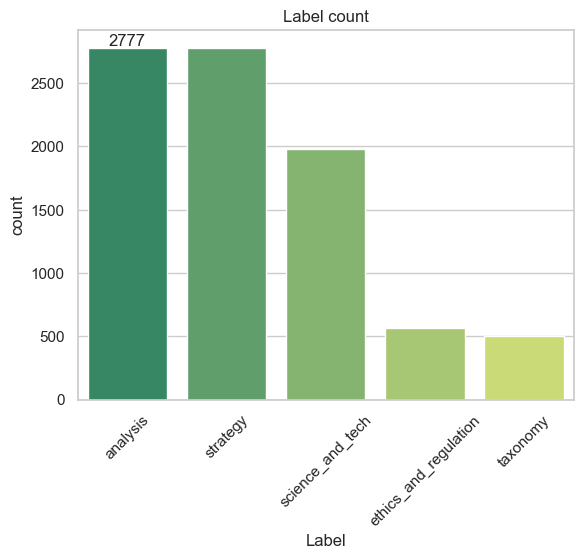

In [16]:
# sns.countplot(df, x="Label")

sns.set(style="whitegrid")
ax = sns.countplot(x='Label', data=df, palette="summer")
ax.bar_label(ax.containers[0])

plt.title("Label count")
plt.xticks(rotation=45)

plt.show()

In [17]:
from wordcloud import WordCloud, STOPWORDS

def word_plot(df,column):
    label_list=df["Label"].unique()
    for i in label_list:
        print(type(i))
        comments = df.where(df["Label"] == i).dropna()[column]

        word_cloud = WordCloud( width = 640, height = 640, background_color = 'black',
                    stopwords = STOPWORDS).generate(str(comments))     # stopwords are a,an,the

        fig = plt.figure( figsize = (8, 5), facecolor = 'k', edgecolor = 'k')
        plt.subplot()
        plt.imshow(word_cloud, interpolation = 'bilinear')
        plt.suptitle("Most frequent words in " +  i , y = 1.06,color = "white")
        plt.tight_layout(pad = 0)
        plt.axis('off')
        plt.show()

word_plot(df,'Question')


In [18]:
word_plot(df,'Answer')


In [ ]:

model = SentenceTransformer("all-MiniLM-L6-v2")



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:

questions=[i for i in df.iloc[:,0]]

embeddings = model.encode(questions)
# embeddings.shape #(8606, 384)
answers=[i for i in df.iloc[:,1]]

embeddings_ans = model.encode(answers)
embeddings_ans.shape

(8606, 384)

In [ ]:
import umap
import umap.plot


/usr/local/lib/python3.10/dist-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


In [ ]:
%%time
embedding = umap.UMAP(n_components=2, metric='cosine').fit(embeddings)
embedding.embedding_.shape


CPU times: user 55.5 s, sys: 607 ms, total: 56.1 s
Wall time: 48 s


(8606, 2)

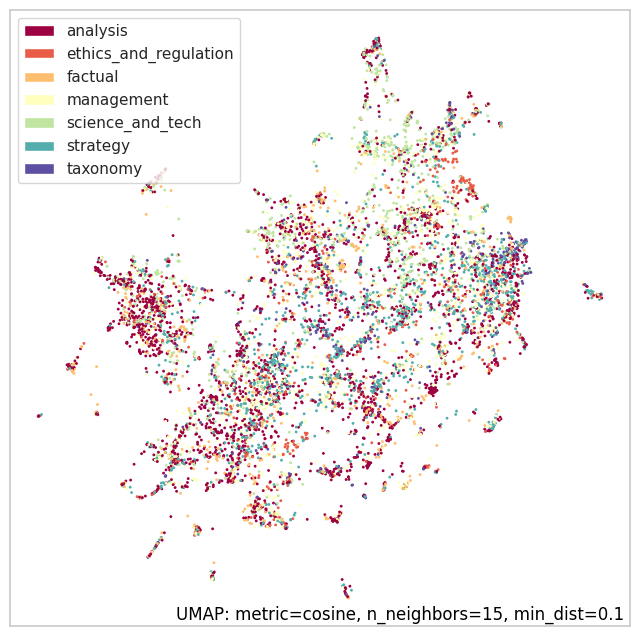

In [ ]:
f = umap.plot.points(embedding, labels=df['Label'])


CPU times: user 24.3 s, sys: 324 ms, total: 24.6 s
Wall time: 16.6 s


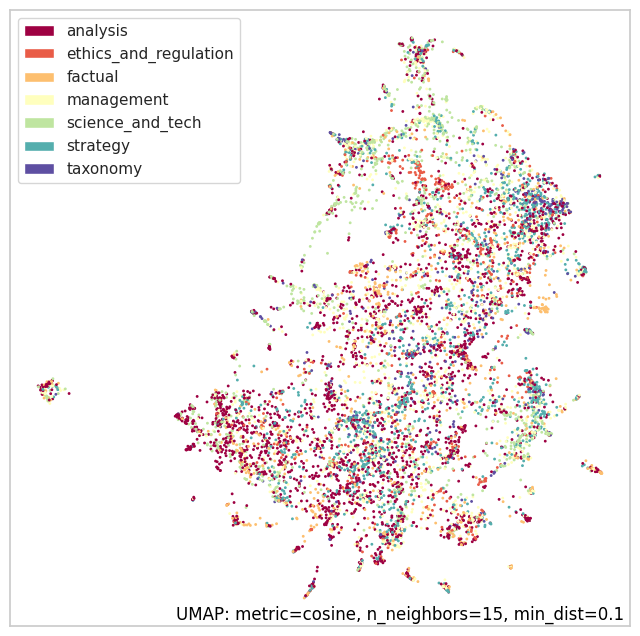

In [ ]:
%%time
embedding_ans_plot = umap.UMAP(n_components=2, metric='cosine').fit(embeddings_ans)
embedding_ans_plot.embedding_.shape
fs = umap.plot.points(embedding_ans_plot, labels=df['Label'])


In [19]:
from sklearn.manifold import TSNE
import plotly.express as px
import plotly

tsne_model_3d = TSNE(n_components=3, random_state=42)
tsne_3d_embeddings_values = tsne_model_3d.fit_transform(embeddings)


fig = px.scatter_3d(
    x = tsne_3d_embeddings_values[:,0],
    y = tsne_3d_embeddings_values[:,1],
    z = tsne_3d_embeddings_values[:,2],
    color = df.Label.values,
    hover_name = df.Question.values,
    title = 't-SNE embeddings', width = 800, height = 600,
    color_discrete_sequence = plotly.colors.qualitative.Alphabet_r,
    opacity = 0.7
)
fig.update_layout(xaxis_title = 'first component', yaxis_title = 'second component')
fig.show()

In [20]:
tsne_model_3d = TSNE(n_components=3, random_state=42)
tsne_3d_embeddings_values_ans = tsne_model_3d.fit_transform(embeddings_ans)

fig = px.scatter_3d(
    x = tsne_3d_embeddings_values_ans[:,0],
    y = tsne_3d_embeddings_values_ans[:,1],
    z = tsne_3d_embeddings_values_ans[:,2],
    color = df.Label.values,
    hover_name = df.Answer.values,
    title = 't-SNE embeddings', width = 800, height = 600,
    color_discrete_sequence = plotly.colors.qualitative.Alphabet_r,
    opacity = 0.7
)
fig.update_layout(xaxis_title = 'first component', yaxis_title = 'second component')
fig.show()

In [ ]:
# import cohere
# # api_key = '' # Paste your API key here. Remember to not share it publicly
# co = cohere.Client(api_key)

In [ ]:
# cotext =[i for i in df.text]
# cotext[:5]

In [22]:
# # Get text embeddings via the Embed endpoint
# articles = cotext

# output = co.embed(
#             model ='embed-english-v3.0',
#             input_type='classification',
#             texts = articles)
# embeds = output.embeddings

# print('Number of articles:', len(embeds))

from torch.utils.data import DataLoader
import math
from sentence_transformers import models, losses
from sentence_transformers import LoggingHandler, SentenceTransformer, util, InputExample
from sentence_transformers.evaluation import EmbeddingSimilarityEvaluator
import logging
from datetime import datetime
import sys
import os
import gzip
import csv

In [23]:
labels = df.Label.unique()
label2dic={}
for id,l in enumerate(labels):
  label2dic[l]=id
label2dic

{'analysis': 0,
 'strategy': 1,
 'science_and_tech': 2,
 'ethics_and_regulation': 3,
 'taxonomy': 4}

In [ ]:
train_batch_size = 16
model_name= 'sentence-transformers/all-MiniLM-L6-v2'
word_embedding_model = models.Transformer(model_name)
pooling_model = models.Pooling(
    word_embedding_model.get_word_embedding_dimension(),
    pooling_mode_mean_tokens=True,
    pooling_mode_cls_token=False,
    pooling_mode_max_tokens=False,
)

model = SentenceTransformer(modules=[word_embedding_model, pooling_model])



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['Question','Answer','Label']], df['Label'], test_size=0.3 ,random_state=42)


In [ ]:
train_samples = []
count=0
for i, row in X_train.iterrows():
  label_id = label2dic[row["Label"]]
  train_samples.append(InputExample(texts=[row["Question"], row["Answer"]], label=label_id))

test_samples=[]
for i, row in X_test.iterrows():
  label_id = label2dic[row["Label"]]
  test_samples.append(InputExample(texts=[row["Question"], row["Answer"]], label=label_id))


In [ ]:
train_dataloader = DataLoader(train_samples, shuffle=True, batch_size=train_batch_size)
train_loss = losses.SoftmaxLoss(
    model=model, sentence_embedding_dimension=model.get_sentence_embedding_dimension(), num_labels=len(label2dic)
)

In [ ]:
dev_evaluator = EmbeddingSimilarityEvaluator.from_input_examples(
    test_samples, batch_size=train_batch_size, name="sts-dev"
)

In [ ]:
num_epochs = 1

warmup_steps = math.ceil(len(train_dataloader) * num_epochs * 0.1)  # 10% of train data for warm-up
# logging.info("Warmup-steps: {}".format(warmup_steps))


# Train the model
model.fit(
    train_objectives=[(train_dataloader, train_loss)],
    evaluator=dev_evaluator,
    epochs=num_epochs,
    evaluation_steps=1000,
    warmup_steps=warmup_steps,
    # output_path=model_save_path,
)


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/377 [00:00<?, ?it/s]



---



In [ ]:
df.head(2)


,Question,Answer,Label,text
0,What is the ranking of Bandung City Government in the smart city index in Indonesia?,Bandung City Government is ranked the 3rd in the smart city index in Indonesia.,analysis,What is the ranking of Bandung City Government in the smart city index in Indonesia? Bandung City Government is ranked the 3rd in the smart city index in Indonesia.
1,What are the three core activities in the smart environment program?,"The three core activities in the smart environment program are the creation of thematic parks as open public spaces, the restoration and revitalization of rivers and their banks, and urban gardening or urban farming.",management,"What are the three core activities in the smart environment program? The three core activities in the smart environment program are the creation of thematic parks as open public spaces, the restoration and revitalization of rivers and their banks, and urban gardening or urban farming."


In [ ]:
# HuggingFACE:

from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F
# device = torch.device("cuda:0")

In [ ]:
#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)


# # Sentences we want sentence embeddings for
sentences = [i for i in df.iloc[:,3]]
# print(sentences)
# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
torch.cuda.empty_cache()
model = model.to(device)

# Tokenize sentences
encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt').to(device)





/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [ ]:
type(encoded_input)

transformers.tokenization_utils_base.BatchEncoding

In [ ]:
print(encoded_input['input_ids'].shape,
encoded_input['token_type_ids'].shape,
encoded_input['attention_mask'].shape)

# import torch
torch.backends.cuda.matmul.allow_tf32 = True
torch.backends.cudnn.allow_tf32 = True


torch.Size([8606, 188]) torch.Size([8606, 188]) torch.Size([8606, 188])


In [21]:
# Compute token embeddings
with torch.no_grad():
    model_output = model(**encoded_input)

# Perform pooling
sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

# Normalize embeddings
sentence_embeddings = F.normalize(sentence_embeddings, p=2, dim=1)

print("Sentence embeddings:")
print(sentence_embeddings.shape)

In [ ]:
# !nvidia-smi -L


GPU 0: Tesla T4 (UUID: GPU-231c3d84-3529-74ff-58f5-00bd63d37980)


In [ ]:
# memory footprint support libraries/code
# !ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
# !pip install gputil
# !pip install psutil
# !pip install humanize

import psutil
import humanize
import os
import GPUtil as GPU

GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
    process = psutil.Process(os.getpid())
    print("Gen RAM Free: " + humanize.naturalsize(psutil.virtual_memory().available), " |     Proc size: " + humanize.naturalsize(process.memory_info().rss))
    print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total     {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

Gen RAM Free: 9.8 GB  |     Proc size: 1.9 GB
GPU RAM Free: 14983MB | Used: 119MB | Util   1% | Total     15360MB


In [ ]:
from numba import cuda
device = cuda.get_current_device()
cuda.get_current_device().reset()
print('GPU RAM is cleared')

GPU RAM is cleared


In [39]:
import spacy
import string
nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words
punctuations = string.punctuation
# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    doc = nlp(sentence)
   # print(doc)
    # print(type(doc))
    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() for word in doc ]
    # print(mytokens)
    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    sentence = " ".join(mytokens)
    # return preprocessed list of tokens
    return sentence
spacy_tokenizer("I am Eating")


'eat'

In [43]:
df['text'] = df['text'].apply(spacy_tokenizer)


,Question,Answer,Label,text,txt
0,What factors contribute to increasing pollutant emissions in developing countries?,"The amelioration of purchasing power, leading to increased individual motorized mobility and per capita waste.",analysis,factor contribute increase pollutant emission develop country amelioration purchase power lead increase individual motorize mobility capita waste,"[factor, contribute, increase, pollutant, emission, develop, country, amelioration, purchase, power, lead, increase, individual, motorize, mobility, capita, waste]"
1,Which gases show a consistent relationship with the Subnets's curve in terms of emissions and per capita GDP?,"The gases CO2 and SPM show a consistent relationship with the Subnets's curve in terms of emissions and per capita GDP. This means that their emissions increase as per capita GDP increases up to a certain threshold, after which they start to decrease. This can be attributed to the characteristics of the fuels and vehicles used in those cities, such as the large share of diesel cars.",analysis,gas consistent relationship subnets curve term emission capita gdp gas co2 spm consistent relationship subnets curve term emission capita gdp mean emission increase capita gdp increase certain threshold start decrease attribute characteristic fuel vehicle use city large share diesel car,"[gas, consistent, relationship, subnets, curve, term, emission, capita, gdp, gas, co2, spm, consistent, relationship, subnets, curve, term, emission, capita, gdp, mean, emission, increase, capita, gdp, increase, certain, threshold, start, decrease, attribute, characteristic, fuel, vehicle, use, city, large, share, diesel, car]"
2,What is a serious problem in evaluating transport and mobility projects?,A serious problem in evaluating transport and mobility projects is how to properly evaluate them.,analysis,problem evaluate transport mobility project problem evaluate transport mobility project properly evaluate,"[problem, evaluate, transport, mobility, project, problem, evaluate, transport, mobility, project, properly, evaluate]"


In [22]:
df.head(3)
# print(torch.__version__)


,Question,Answer,Label,text
0,What factors contribute to increasing pollutant emissions in developing countries?,"The amelioration of purchasing power, leading to increased individual motorized mobility and per capita waste.",analysis,"What factors contribute to increasing pollutant emissions in developing countries? The amelioration of purchasing power, leading to increased individual motorized mobility and per capita waste."
1,Which gases show a consistent relationship with the Subnets's curve in terms of emissions and per capita GDP?,"The gases CO2 and SPM show a consistent relationship with the Subnets's curve in terms of emissions and per capita GDP. This means that their emissions increase as per capita GDP increases up to a certain threshold, after which they start to decrease. This can be attributed to the characteristics of the fuels and vehicles used in those cities, such as the large share of diesel cars.",analysis,"Which gases show a consistent relationship with the Subnets's curve in terms of emissions and per capita GDP? The gases CO2 and SPM show a consistent relationship with the Subnets's curve in terms of emissions and per capita GDP. This means that their emissions increase as per capita GDP increases up to a certain threshold, after which they start to decrease. This can be attributed to the characteristics of the fuels and vehicles used in those cities, such as the large share of diesel cars."
2,What is a serious problem in evaluating transport and mobility projects?,A serious problem in evaluating transport and mobility projects is how to properly evaluate them.,analysis,What is a serious problem in evaluating transport and mobility projects? A serious problem in evaluating transport and mobility projects is how to properly evaluate them.


In [23]:
df['Label'].value_counts()
possible_labels = df.Label.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{'analysis': 0,
 'strategy': 1,
 'science_and_tech': 2,
 'ethics_and_regulation': 3,
 'taxonomy': 4}

In [24]:
df['label'] = df.Label.replace(label_dict)


from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df.index.values,
                                                  df.label.values,
                                                  test_size=0.15,
                                                  random_state=42,
                                                  stratify=df.label.values)

df['data_type'] = ['not_set']*df.shape[0]

df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'

df.groupby(['Label', 'label', 'data_type']).count()

/var/folders/ty/wd4mllvj65qdj2g4p9nmd88m0000gn/T/ipykernel_1718/2295158239.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label'] = df.Label.replace(label_dict)


Question  Answer  text
Label                 label data_type                        
analysis              0     train          2360    2360  2360
                            val             417     417   417
ethics_and_regulation 3     train           478     478   478
                            val              84      84    84
science_and_tech      2     train          1685    1685  1685
                            val             298     298   298
strategy              1     train          2365    2365  2365
                            val             417     417   417
taxonomy              4     train           427     427   427
                            val              75      75    75

In [168]:
import datasets
from datasets import Dataset, DatasetDict
# df = df.drop(['tokenized_dataset'],axis=1)
newdf = df[['text','label','data_type']]
# print()
tdf = newdf[newdf.data_type == "train"]
tdf =tdf.drop(['data_type'],axis=1)
print(tdf.shape)
vdf = newdf[newdf.data_type == "val"]
vdf =vdf.drop(['data_type'],axis=1)
print(vdf.shape)

tds = Dataset.from_pandas(tdf)
vds = Dataset.from_pandas(vdf)


ds = DatasetDict()

ds['train'] = tds
ds['validation'] = vds

# newdf.shape

(7315, 2)
(1291, 2)


In [169]:
# print(ds)

# print(ds['train'][1])
# print(ds['validation'][0
ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label', '__index_level_0__'],
        num_rows: 7315
    })
    validation: Dataset({
        features: ['text', 'label', '__index_level_0__'],
        num_rows: 1291
    })
})

In [170]:
from transformers import AutoTokenizer

# Model id to load the tokenizer
model_id = "bert-base-uncased"
# Load Tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_id)

# Tokenize helper function
def tokenize(batch):
    return tokenizer(batch['text'], padding='max_length', truncation=True, return_tensors="pt")

# Tokenize dataset
ds =  ds.rename_column("label", "labels") # to match Trainer
tokenized_dataset = ds.map(tokenize, batched=True,remove_columns=["text"])

print(tokenized_dataset["train"].features.keys())

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 10.72ba/s]

dict_keys(['labels', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'])


In [25]:
from transformers import AutoModelForSequenceClassification

# Model id to load the tokenizer
model_id = "bert-base-uncased"

possible_labels = df.Label.unique()

label2id = {}
id2label={}
for index, possible_label in enumerate(possible_labels):
    label2id[possible_label] = index
    id2label[index] = possible_label
# label_dict
# label2id = label_dict
print(label2id)
print(id2label)
num_labels = len(label2id)
print(num_labels)
# Prepare model labels - useful for inference
# labels = tokenized_dataset["train"].features["labels"].names
# num_labels = len(labels)
# label2id, id2label = dict(), dict()
# for i, label in enumerate(labels):
#     label2id[label] = str(i)
#     id2label[str(i)] = label

# Download the model from huggingface.co/models
model = AutoModelForSequenceClassification.from_pretrained(
    model_id, num_labels=num_labels, label2id=label2id, id2label=id2label
)

In [ ]:
# model = SentenceTransformer("all-MiniLM-L6-v2")
model = SentenceTransformer("all-mpnet-base-v2")
# Embed a list of sentences



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
df['text']= df.Question+' '+df.Answer
df.head(2)


,Question,Answer,Label,text
0,What is the ranking of Bandung City Government in the smart city index in Indonesia?,Bandung City Government is ranked the 3rd in the smart city index in Indonesia.,analysis,What is the ranking of Bandung City Government in the smart city index in Indonesia? Bandung City Government is ranked the 3rd in the smart city index in Indonesia.
1,What are the three core activities in the smart environment program?,"The three core activities in the smart environment program are the creation of thematic parks as open public spaces, the restoration and revitalization of rivers and their banks, and urban gardening or urban farming.",strategy,"What are the three core activities in the smart environment program? The three core activities in the smart environment program are the creation of thematic parks as open public spaces, the restoration and revitalization of rivers and their banks, and urban gardening or urban farming."


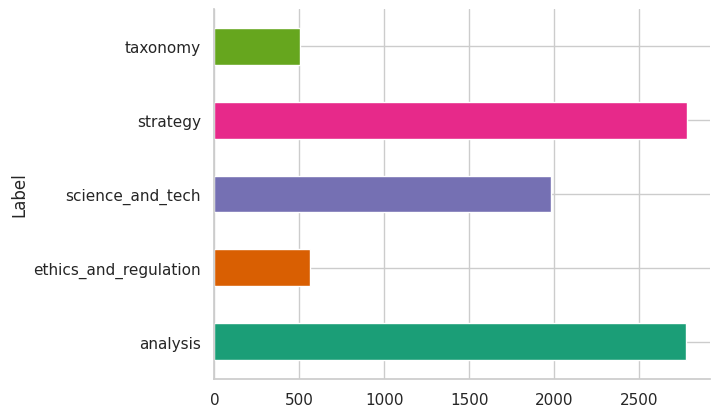

In [ ]:
# @title Label

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# sentences = [i for i in df.iloc[:,3]]
# df['embeddings'] = df['text'].apply(model.encode)
# df['qembeddings']= df['Question'].apply(model.encode)
# sentence_embeddings = model.encode(sentences)
questions=[i for i in df.iloc[:,3]]

embeddings = model.encode(questions,show_progress_bar=True)

Batches:   0%|          | 0/269 [00:00<?, ?it/s]

In [ ]:
df.head(2)
# [0.03382193, -0.05722998, 0.052711066, 0.015644778

,Question,Answer,Label,text
0,What is the ranking of Bandung City Government in the smart city index in Indonesia?,Bandung City Government is ranked the 3rd in the smart city index in Indonesia.,analysis,What is the ranking of Bandung City Government in the smart city index in Indonesia? Bandung City Government is ranked the 3rd in the smart city index in Indonesia.
1,What are the three core activities in the smart environment program?,"The three core activities in the smart environment program are the creation of thematic parks as open public spaces, the restoration and revitalization of rivers and their banks, and urban gardening or urban farming.",strategy,"What are the three core activities in the smart environment program? The three core activities in the smart environment program are the creation of thematic parks as open public spaces, the restoration and revitalization of rivers and their banks, and urban gardening or urban farming."


In [ ]:
lab=['analysis','strategy','science_and_tech','taxonomy','ethics_and_regulation']
map={}
count=0
for i,row in df.iterrows():
  # print(row['Label'])
  if(row['Label'] in lab):
    map[row['Label']] = row['Label_encoded']
    lab.remove(row['Label'])
  count+=1
  if count==50:
    break
map

{'analysis': 0,
 'strategy': 3,
 'science_and_tech': 2,
 'taxonomy': 4,
 'ethics_and_regulation': 1}

In [ ]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()

df['Label_encoded']= label.fit_transform(df['Label'])

df.head(2)

,Question,Answer,Label,text,Label_encoded
0,What is the ranking of Bandung City Government in the smart city index in Indonesia?,Bandung City Government is ranked the 3rd in the smart city index in Indonesia.,analysis,What is the ranking of Bandung City Government in the smart city index in Indonesia? Bandung City Government is ranked the 3rd in the smart city index in Indonesia.,0
1,What are the three core activities in the smart environment program?,"The three core activities in the smart environment program are the creation of thematic parks as open public spaces, the restoration and revitalization of rivers and their banks, and urban gardening or urban farming.",strategy,"What are the three core activities in the smart environment program? The three core activities in the smart environment program are the creation of thematic parks as open public spaces, the restoration and revitalization of rivers and their banks, and urban gardening or urban farming.",3


In [ ]:
from sklearn.model_selection import train_test_split
# X = df['embeddings'].to_list()
X=embeddings
y = df['Label_encoded'].to_list()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='saga',max_iter=800)
LR.fit(X_train,y_train)

LogisticRegression(max_iter=800, solver='saga')

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score

predicted = LR.predict(X_test)
print(classification_report(y_test,predicted))
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != predicted).sum()))


              precision    recall  f1-score   support

           0       0.65      0.70      0.67       566
           1       0.62      0.35      0.45       124
           2       0.63      0.56      0.59       411
           3       0.63      0.73      0.68       525
           4       0.58      0.40      0.47        96

    accuracy                           0.64      1722
   macro avg       0.62      0.55      0.57      1722
weighted avg       0.63      0.64      0.63      1722

Number of mislabeled points out of a total 1722 points : 628


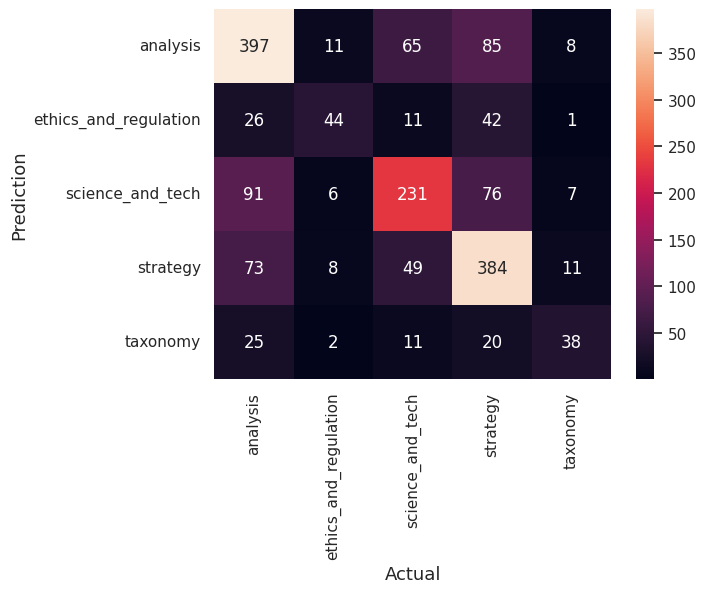

In [ ]:

from sklearn import metrics
y_test = np.array(y_test)
predicted = np.array(predicted)

cm = metrics.confusion_matrix(y_test,predicted)
# {'analysis': 0,
#  'strategy': 3,
#  'science_and_tech': 2,
#  'taxonomy': 4,
#  'ethics_and_regulation': 1}

sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['analysis','ethics_and_regulation','science_and_tech','strategy','taxonomy'],
            yticklabels=['analysis','ethics_and_regulation','science_and_tech','strategy','taxonomy'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
# plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
print(classification_report(y_test,preds))


              precision    recall  f1-score   support

           0       0.55      0.69      0.61       566
           1       0.91      0.08      0.15       124
           2       0.63      0.49      0.55       411
           3       0.56      0.72      0.63       525
           4       0.69      0.09      0.17        96

    accuracy                           0.57      1722
   macro avg       0.67      0.41      0.42      1722
weighted avg       0.61      0.57      0.55      1722



In [ ]:
from sklearn.naive_bayes import *
gnb = BernoulliNB()
preds = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != preds).sum()))
print(classification_report(y_test,preds))


Number of mislabeled points out of a total 1722 points : 794
              precision    recall  f1-score   support

           0       0.59      0.54      0.57       566
           1       0.35      0.48      0.41       124
           2       0.51      0.56      0.53       411
           3       0.65      0.53      0.58       525
           4       0.34      0.55      0.42        96

    accuracy                           0.54      1722
   macro avg       0.49      0.53      0.50      1722
weighted avg       0.56      0.54      0.54      1722



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=72)
preds=neigh.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test,preds))


              precision    recall  f1-score   support

           0       0.57      0.69      0.62       566
           1       0.78      0.15      0.24       124
           2       0.72      0.31      0.44       411
           3       0.52      0.80      0.63       525
           4       0.50      0.16      0.24        96

    accuracy                           0.56      1722
   macro avg       0.62      0.42      0.43      1722
weighted avg       0.60      0.56      0.53      1722



In [ ]:
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression


# # Define a list of classifiers
# classifiers = [
#     # RandomForestClassifier(),
#     GradientBoostingClassifier(),
#     SVC(),
#     KNeighborsClassifier(),
#     # LogisticRegression()
# ]

# # Train and evaluate each classifier
# for classifier in classifiers:
#     # Train the classifier
#     classifier.fit(X_train, y_train)

#     # Make predictions
#     y_pred = classifier.predict(X_test)

#     # Evaluate performance
#     accuracy = accuracy_score(y_test, y_pred)
#     report = classification_report(y_test, y_pred)

#     # Display results
#     print(f"\n{classifier.__class__.__name__} Results:")
#     print(f"Accuracy: {accuracy:.4f}")
#     print(f"Classification Report:\n{report}")


GradientBoostingClassifier Results:
Accuracy: 0.4895
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.76      0.62       556
           1       0.61      0.35      0.44       112
           2       0.50      0.31      0.38       172
           3       0.42      0.32      0.36       291
           4       0.48      0.44      0.45       225
           5       0.44      0.45      0.45       266
           6       0.42      0.19      0.26       100

    accuracy                           0.49      1722
   macro avg       0.48      0.40      0.42      1722
weighted avg       0.48      0.49      0.47      1722


SVC Results:
Accuracy: 0.5256
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.76      0.63       556
           1       0.65      0.41      0.50       112
           2       0.65      0.37      0.47       172
           3       0.46      0.41      0.43       291
 

In [ ]:
# !pip install top2vec[sentence_transformers]


In [ ]:
embeddings_array=model.encode([i for i in df.text])

In [ ]:
# from top2vec import Top2Vec

# models = Top2Vec(sentences,embedding_model=model)
from sklearn.manifold import TSNE
import plotly.express as px
import plotly

tsne_model_3d = TSNE(n_components=3, random_state=42)
tsne_3d_embeddings_values_ans = tsne_model_3d.fit_transform(embeddings_array)

fig = px.scatter_3d(
    x = tsne_3d_embeddings_values_ans[:,0],
    y = tsne_3d_embeddings_values_ans[:,1],
    z = tsne_3d_embeddings_values_ans[:,2],
    color = df.Label.values,
    hover_name = df.text.values,
    title = 't-SNE embeddings', width = 800, height = 600,
    color_discrete_sequence = plotly.colors.qualitative.Alphabet_r,
    opacity = 0.7
)
fig.update_layout(xaxis_title = 'first component', yaxis_title = 'second component')
fig.show()

second approach
----

In [ ]:
df.head()

,Question,Answer,Label,text
0,What is the main strategy of Smart Cities like Barcelona in transforming their city infrastructure and services?,"Smart Cities like Barcelona base their strategy on the use of information and communication technologies in various fields such as economy, environment, mobility, and governance.",strategy,"What is the main strategy of Smart Cities like Barcelona in transforming their city infrastructure and services? Smart Cities like Barcelona base their strategy on the use of information and communication technologies in various fields such as economy, environment, mobility, and governance."
1,What are the main components of Barcelona's Smart City strategy?,"The main components of Barcelona's Smart City strategy are described in terms of Smart districts, living labs, initiatives, e-Services, infrastructures, and Open Data.",strategy,"What are the main components of Barcelona's Smart City strategy? The main components of Barcelona's Smart City strategy are described in terms of Smart districts, living labs, initiatives, e-Services, infrastructures, and Open Data."
2,Why are governments investing in advanced infrastructures for sustainable urban development?,Governments are investing in advanced infrastructures to keep up with competition and accommodate the escalating urban population.,strategy,Why are governments investing in advanced infrastructures for sustainable urban development? Governments are investing in advanced infrastructures to keep up with competition and accommodate the escalating urban population.
3,How are cities transforming to enhance their international competitiveness?,Cities are undergoing fundamental transformations by implementing ICT infrastructures and repositioning themselves on the global stage.,strategy,How are cities transforming to enhance their international competitiveness? Cities are undergoing fundamental transformations by implementing ICT infrastructures and repositioning themselves on the global stage.
4,How has Barcelona transformed itself into a Smart City?,"Barcelona has undertaken significant reforms to become a Smart City. The city has implemented various initiatives, particularly in the industrial area 22@Barcelona district, to embrace smart technologies and improve efficiency and sustainability.",strategy,"How has Barcelona transformed itself into a Smart City? Barcelona has undertaken significant reforms to become a Smart City. The city has implemented various initiatives, particularly in the industrial area 22@Barcelona district, to embrace smart technologies and improve efficiency and sustainability."


In [28]:
import re
import string
import nltk
import spacy
import pandas as pd
import numpy as np
import math
from tqdm import tqdm

from spacy.matcher import Matcher
from spacy.tokens import Span
from spacy import displacy

pd.set_option('display.max_colwidth', 200)

In [36]:
nlp = spacy.load("en_core_web_sm")


In [37]:
# sample text
# text = "Bandung City Government is ranked the 3rd in the smart city index in Indonesia."
text = "Vaibhav Upadhyay published this article on Dec 1, 2023."

# create a spaCy object
doc = nlp(text)
# print token, dependency, POS tag
for tok in doc:
  print(tok.text, "-->",tok.dep_,"-->", tok.pos_,"-->",tok.ent_type_,"-->")

Vaibhav --> compound --> PROPN --> PERSON -->
Upadhyay --> nsubj --> PROPN --> PERSON -->
published --> ROOT --> VERB -->  -->
this --> det --> DET -->  -->
article --> dobj --> NOUN -->  -->
on --> prep --> ADP -->  -->
Dec --> pobj --> PROPN --> DATE -->
1 --> nummod --> NUM --> DATE -->
, --> punct --> PUNCT --> DATE -->
2023 --> nummod --> NUM --> DATE -->
. --> punct --> PUNCT -->  -->


In [38]:
print(doc.ents)

(Vaibhav Upadhyay, Dec 1, 2023)


In [39]:
displacy.render(doc, style = "ent",jupyter = True)


In [40]:
displacy.render(doc, style = "dep",jupyter = True)


In [41]:
labels=["CARDINAL",
        "DATE",
        "EVENT",
        "FAC",
        "GPE",
        "LANGUAGE",
        "LAW",
        "LOC",
        "MONEY",
        "NORP",
        "ORDINAL",
        "ORG",
        "PERCENT",
        "PERSON",
        "PRODUCT",
        "QUANTITY",
        "TIME",
        "WORK_OF_ART",
        "LOC",
        "MISC",
        "ORG",
        "PER"]
[(spacy.explain(i),i) for i in labels]

[('Numerals that do not fall under another type', 'CARDINAL'),
 ('Absolute or relative dates or periods', 'DATE'),
 ('Named hurricanes, battles, wars, sports events, etc.', 'EVENT'),
 ('Buildings, airports, highways, bridges, etc.', 'FAC'),
 ('Countries, cities, states', 'GPE'),
 ('Any named language', 'LANGUAGE'),
 ('Named documents made into laws.', 'LAW'),
 ('Non-GPE locations, mountain ranges, bodies of water', 'LOC'),
 ('Monetary values, including unit', 'MONEY'),
 ('Nationalities or religious or political groups', 'NORP'),
 ('"first", "second", etc.', 'ORDINAL'),
 ('Companies, agencies, institutions, etc.', 'ORG'),
 ('Percentage, including "%"', 'PERCENT'),
 ('People, including fictional', 'PERSON'),
 ('Objects, vehicles, foods, etc. (not services)', 'PRODUCT'),
 ('Measurements, as of weight or distance', 'QUANTITY'),
 ('Times smaller than a day', 'TIME'),
 ('Titles of books, songs, etc.', 'WORK_OF_ART'),
 ('Non-GPE locations, mountain ranges, bodies of water', 'LOC'),
 ('Miscell

In [33]:
!pip install symspellpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 1.4 MB/s eta 0:00:002.1 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 12.8 MB/s eta 0:00:00m eta 0:00:010:0101
  Created wheel for editdistpy: filename=editdistpy-0.1.3-cp311-cp311-macosx_13_0_arm64.whl size=42476 sha256=118d0c58425690be25d6d82fca925a35cbad7812abf3e28ec1a547c96109765e
  Stored in directory: /Users/vaibhav/Library/Caches/pip/wheels/a3/77/33/cf3edcd2557c3092e08264ff73f27e69bc334ce101abc202c9
Successfully built editdistpy


In [31]:
!curl -o ds/frequency_dictionary_en_82_765.txt https://raw.githubusercontent.com/wolfgarbe/SymSpell/master/SymSpell/frequency_dictionary_en_82_765.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1301k  100 1301k    0     0  1561k      0 --:--:-- --:--:-- --:--:-- 1568k


In [34]:
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from symspellpy import SymSpell, Verbosity

# Ensure necessary NLTK resources are downloaded
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("omw")

# Initialize necessary objects and variables
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
sym_spell.load_dictionary("ds/frequency_dictionary_en_82_765.txt", term_index=0, count_index=1)
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vaibhav/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /Users/vaibhav/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Error with downloaded zip file
[nltk_data] Downloading package wordnet to /Users/vaibhav/nltk_data...
[nltk_data] Downloading package omw to /Users/vaibhav/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/vaibhav/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:

def preprocess_text(text):
    # Remove HTML tags
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()

    # Remove punctuation marks
    text = re.sub(r"[^\w\s]", "", text)

    # Remove numeric expressions
    text = re.sub(r"\d+", "", text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize into words
    words = nltk.word_tokenize(text)

    # Remove stop words
    words = [word for word in words if word not in stop_words]

    # Correct word spellings
    words = [sym_spell.lookup(word, verbosity=Verbosity.CLOSEST, max_edit_distance=2)[0].term if sym_spell.lookup(word, verbosity=Verbosity.CLOSEST, max_edit_distance=2) else word for word in words]

    # Apply lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]

    # Remove stop words formed after lemmatization
    words = [word for word in words if word not in stop_words]

    # Rejoin into a single string
    text = " ".join(words)

    return text

# Assume `df` is the input DataFrame and `text` is the column to be preprocessed
# df["text"] = df["text"].apply(preprocess_text)


In [ ]:
sample_text = """Iranian authorities on Saturday executed journalist Ruhollah Zam over his online work that helped inspire nationwide economic protests in 2017. A court had sentenced Zam to death in June after he was found guilty of “corruption on earth”, one of the country's most serious offences. Zam had been living in exile in France but was arrested in October last year."""

# sample_text = "Iranian authorities on Saturday executed journalist Ruhollah Zam"
print(preprocess_text(sample_text))

[('iranian', 'JJ'), ('authorities', 'NNS'), ('saturday', 'VBP'), ('executed', 'VBN'), ('journalist', 'NN'), ('ruhollah', 'NN'), ('am', 'VBP'), ('online', 'JJ'), ('work', 'NN'), ('helped', 'VBD'), ('inspire', 'VB'), ('nationwide', 'JJ'), ('economic', 'JJ'), ('protests', 'NNS'), ('court', 'NN'), ('sentenced', 'VBD'), ('am', 'VBP'), ('death', 'NN'), ('june', 'NN'), ('found', 'VBD'), ('guilty', 'JJ'), ('corruption', 'NN'), ('earth', 'IN'), ('one', 'CD'), ('country', 'NN'), ('serious', 'JJ'), ('offences', 'NNS'), ('am', 'VBP'), ('living', 'VBG'), ('exile', 'NN'), ('france', 'NN'), ('arrested', 'VBD'), ('october', 'IN'), ('last', 'JJ'), ('year', 'NN')]
iranian authority saturday execute journalist be work help inspire protest court sentence be death june find corruption earth one country offence be populate exile france arrest october last year


In [ ]:

def get_wordnet_pos(tag):
    """
    Map POS tag to WordNet POS tag.
    """
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def preprocess_text(text):
    # Remove punctuation marks
    text = re.sub(r"[^\w\s]", "", text)

    # Remove HTML tags
    text = re.sub(r"<[^>]+>", "", text)

    # Remove numeric expressions
    text = re.sub(r"\d+", "", text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize into words
    words = nltk.word_tokenize(text)

    # Remove stop words
    words = [word for word in words if word not in stop_words]

    # Correct word spellings
    words = [sym_spell.lookup(word, verbosity=Verbosity.CLOSEST, max_edit_distance=2)[0].term if sym_spell.lookup(word, verbosity=Verbosity.CLOSEST, max_edit_distance=2) else word for word in words]

    # Apply lemmatization using WordNet
    tagged_words = nltk.pos_tag(words)

    print(tagged_words)
    words = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in tagged_words]

    # Replace lexicons using WordNet
    noun_synsets = set(wordnet.all_synsets(pos=wordnet.NOUN))
    verb_synsets = set(wordnet.all_synsets(pos=wordnet.VERB))
    words = [word if wordnet.synsets(word, pos=wordnet.NOUN) else wordnet.synsets(word, pos=wordnet.VERB)[0].lemmas()[0].name() for word in words if wordnet.synsets(word, pos=wordnet.NOUN) or wordnet.synsets(word, pos=wordnet.VERB)]
    words = [noun_synsets.pop().lemmas()[0].name() if word in noun_synsets else word for word in words]
    words = [verb_synsets.pop().lemmas()[0].name() if word in verb_synsets else word for word in words]

    # Rejoin into a single string
    text = " ".join(words)

    return text


In [ ]:
sample_text = """Iranian authorities on Saturday executed journalist Ruhollah Zam over his online work that helped inspire nationwide economic protests in 2017. A court had sentenced Zam to death in June after he was found guilty of “corruption on earth”, one of the country's most serious offences. Zam had been living in exile in France but was arrested in October last year."""

# sample_text = "Iranian authorities on Saturday executed journalist Ruhollah Zam"
print(preprocess_text(sample_text))

[('iranian', 'JJ'), ('authorities', 'NNS'), ('saturday', 'VBP'), ('executed', 'VBN'), ('journalist', 'NN'), ('ruhollah', 'NN'), ('am', 'VBP'), ('online', 'JJ'), ('work', 'NN'), ('helped', 'VBD'), ('inspire', 'VB'), ('nationwide', 'JJ'), ('economic', 'JJ'), ('protests', 'NNS'), ('court', 'NN'), ('sentenced', 'VBD'), ('am', 'VBP'), ('death', 'NN'), ('june', 'NN'), ('found', 'VBD'), ('guilty', 'JJ'), ('corruption', 'NN'), ('earth', 'IN'), ('one', 'CD'), ('country', 'NN'), ('serious', 'JJ'), ('offences', 'NNS'), ('am', 'VBP'), ('living', 'VBG'), ('exile', 'NN'), ('france', 'NN'), ('arrested', 'VBD'), ('october', 'IN'), ('last', 'JJ'), ('year', 'NN')]
iranian authority saturday execute journalist be work help inspire protest court sentence be death june find corruption earth one country offence be populate exile france arrest october last year


In [ ]:
from nltk.corpus import wordnet as wn
for synset in list(wn.all_synsets('v'))[:10]:
  print(synset,' ',synset.root_hypernyms())

Synset('breathe.v.01')   [Synset('breathe.v.01')]
Synset('respire.v.02')   [Synset('change.v.02')]
Synset('respire.v.01')   [Synset('breathe.v.01')]
Synset('choke.v.01')   [Synset('breathe.v.01')]
Synset('hyperventilate.v.02')   [Synset('breathe.v.01')]
Synset('hyperventilate.v.01')   [Synset('treat.v.03')]
Synset('aspirate.v.03')   [Synset('breathe.v.01')]
Synset('burp.v.01')   [Synset('exhaust.v.05')]
Synset('force_out.v.08')   [Synset('exhaust.v.05')]
Synset('hiccup.v.01')   [Synset('breathe.v.01')]


In [ ]:

syn = wordnet.synsets('hello')[0]
print ("Syn tag : ", syn.pos())

Syn tag :  n


In [ ]:
# def token_type_lookup(token, report_detail=False):

#     if type(token)==str:
#         token = nlp(token)[0]

#     key = token.lower_

#     try:
#         if report_detail:
#             print(ENTITY_ENUM[word_ent_type_dict[key]], ' <= ', {ENTITY_ENUM[ent_t] : vote_dict[key][ent_t] for ent_t in vote_dict[key]} )

#         return word_ent_type_dict[key]

#     except KeyError:
#         return ''

# def is_token_has_second_type(token):

#     if type(token)==str:
#         token = nlp(token)[0]

#     key = token.lower_

#     try:
#         return key in word_ent_type_second_dict
#     except KeyError:
#         return False

# def token_second_type_lookup(token, report_detail=False):

#     if type(token)==str:
#         token = nlp(token)[0]

#     key = token.lower_

#     try:
#         if report_detail:
#             print(ENTITY_ENUM[word_ent_type_second_dict[key]], ' <= ', {ENTITY_ENUM[ent_t] : vote_dict[key][ent_t] for ent_t in vote_dict[key]} )

#         return word_ent_type_second_dict[key]
#     except KeyError:
#         return ''

In [43]:
ENTITY_ENUM = {
    '': '',
    'PERSON': 'person',
    'NORP': 'nationality',
    'FAC': 'facility',
    'ORG': 'organization',
    'GPE': 'country',
    'LOC': 'location',
    'PRODUCT': 'product',
    'EVENT': 'event',
    'WORK_OF_ART': 'artwork',
    'LANGUAGE': 'language',
    'DATE': 'date',
    'TIME': 'time',
    'PERCENT': 'percent',
    'MONEY': 'money',
    'QUANTITY': 'quantity',
    'ORDINAL': 'ordinal',
    'CARDINAL': 'cardinal',
    'PERCENT': 'number',
    'MONEY': 'number',
    'QUANTITY': 'number',
    'ORDINAL': 'number',
    'CARDINAL': 'number',
    'LAW': 'law',
    'WORK_OF_ART' : 'entity'
}

NUMERIC_TYPES = set([
    'DATE',
    'TIME',
    'PERCENT',
    'MONEY',
    'QUANTITY',
    'ORDINAL',
    'CARDINAL',
])
doc1 = nlp('Is Hubert a good programmer?')
doc2 = nlp('Hubert is eating bugs!')

print(doc1[1].text, '->', doc1[1].ent_type_) # can't recognize entity type
print(doc2[0].text, '->', doc2[0].ent_type_)

Hubert -> PERSON
Hubert -> PERSON


In [44]:

def substitue(docs):
  #substitute entities with their TAGS
  # docs = nlp.pipe(texts)
  out = []

  res=""
  last_ent=''
  for doc in docs:
      out_ = ""
      # for tok in doc:
      text = doc.text

      # print(text,' ',doc.ent_type_,' ')
      # if doc.ent_type_ :
      if doc.ent_type_ and  ENTITY_ENUM[doc.ent_type_] != last_ent:
        text = ENTITY_ENUM[doc.ent_type_]
        res = res + text+ doc.whitespace_
        # prev+= 1
        last_ent=res.split()[-1]
        # print(last_ent)
      elif ENTITY_ENUM[doc.ent_type_] is last_ent :
        last_ent=''
      if not doc.ent_type_:
        res = res  + text+ doc.whitespace_
        last_ent=''
      out_ += text + doc.whitespace_
      out.append(out_)
  # print('res',res)
  return res
def preprocess_final(text):
      # Remove punctuation marks
    # text = re.sub(r"[^\w\s]", "", text)

    # # Remove HTML tags
    # text = re.sub(r"<[^>]+>", "", text)

    # # Remove numeric expressions
    # text = re.sub(r"\d+", "", text)

    # # Convert to lowercase
    # text = text.lower()
    doc = nlp(text)
    # for tok in doc:
    #   print(tok.text, "-->",tok.dep_,"-->", tok.pos_,"-->",tok.ent_type_,"-->")

    sub_text = substitue(doc)
    return sub_text
sent ="What was the first Action identified in the European Commission's 2009 Action Plan for Urban Transport?	"
print(preprocess_final(sent))

What was the number Action identified in organization date Action Plan for Urban Transport?	


In [45]:
df['ner_text']=df['text'].apply(preprocess_final)

In [46]:
# df[['Question','ner_questions']].head()
df.head()

,Question,Answer,Label,text,label,data_type,ner_text
0,What factors contribute to increasing pollutant emissions in developing countries?,"The amelioration of purchasing power, leading to increased individual motorized mobility and per capita waste.",analysis,"What factors contribute to increasing pollutant emissions in developing countries? The amelioration of purchasing power, leading to increased individual motorized mobility and per capita waste.",0,train,"What factors contribute to increasing pollutant emissions in developing countries? The amelioration of purchasing power, leading to increased individual motorized mobility and per capita waste."
1,Which gases show a consistent relationship with the Subnets's curve in terms of emissions and per capita GDP?,The gases CO2 and SPM show a consistent relationship with the Subnets's curve in terms of emissions and per capita GDP. This means that their emissions increase as per capita GDP increases up to a...,analysis,Which gases show a consistent relationship with the Subnets's curve in terms of emissions and per capita GDP? The gases CO2 and SPM show a consistent relationship with the Subnets's curve in terms...,0,val,Which gases show a consistent relationship with the organization's curve in terms of emissions and per capita GDP? The gases CO2 and organization show a consistent relationship with the organizati...
2,What is a serious problem in evaluating transport and mobility projects?,A serious problem in evaluating transport and mobility projects is how to properly evaluate them.,analysis,What is a serious problem in evaluating transport and mobility projects? A serious problem in evaluating transport and mobility projects is how to properly evaluate them.,0,train,What is a serious problem in evaluating transport and mobility projects? A serious problem in evaluating transport and mobility projects is how to properly evaluate them.
3,What factors influence commuters' satisfaction with public transport?,The activities that commuters engage in while in their vehicles can affect their satisfaction with public transport.,analysis,What factors influence commuters' satisfaction with public transport? The activities that commuters engage in while in their vehicles can affect their satisfaction with public transport.,0,train,What factors influence commuters' satisfaction with public transport? The activities that commuters engage in while in their vehicles can affect their satisfaction with public transport.
4,What is the percentage of residents travelling by private cars daily?,The annual average concentration of NO2 and PM in the city is measured as part of the indicators used to assess the effectiveness of a SUMP. These indicators provide data on air quality and pollut...,analysis,What is the percentage of residents travelling by private cars daily? The annual average concentration of NO2 and PM in the city is measured as part of the indicators used to assess the effectiven...,0,val,What is the percentage of residents travelling by private cars daily? The date average concentration of language and PM in the city is measured as part of the indicators used to assess the effecti...


In [59]:
import torch
from tqdm import tqdm

from transformers import BertTokenizer
from torch.utils.data import TensorDataset

from transformers import BertForSequenceClassification


In [69]:
df['Label'].value_counts()
possible_labels = df.Label.unique()

label_dict = {}
id2label={}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
    id2label[index] = possible_label
print(label_dict)
print(id2label)

{'analysis': 0, 'strategy': 1, 'science_and_tech': 2, 'ethics_and_regulation': 3, 'taxonomy': 4}
{0: 'analysis', 1: 'strategy', 2: 'science_and_tech', 3: 'ethics_and_regulation', 4: 'taxonomy'}


In [49]:
df['label'] = df.Label.replace(label_dict)


/var/folders/ty/wd4mllvj65qdj2g4p9nmd88m0000gn/T/ipykernel_1718/2844078641.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label'] = df.Label.replace(label_dict)


In [50]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df.index.values,
                                                  df.label.values,
                                                  test_size=0.15,
                                                  random_state=42,
                                                  stratify=df.label.values)

df['data_type'] = ['not_set']*df.shape[0]

df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'

df.groupby(['Label', 'label', 'data_type']).count()

Question  Answer  text  ner_text
Label                 label data_type                                  
analysis              0     train          2360    2360  2360      2360
                            val             417     417   417       417
ethics_and_regulation 3     train           478     478   478       478
                            val              84      84    84        84
science_and_tech      2     train          1685    1685  1685      1685
                            val             298     298   298       298
strategy              1     train          2365    2365  2365      2365
                            val             417     417   417       417
taxonomy              4     train           427     427   427       427
                            val              75      75    75        75

In [52]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
                                          do_lower_case=True)

encoded_data_train = tokenizer.batch_encode_plus(
    df[df.data_type=='train'].ner_text.values,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=256,
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    df[df.data_type=='val'].ner_text.values,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=256,
    return_tensors='pt'
)


input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type=='train'].label.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(df[df.data_type=='val'].label.values)

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/Users/vaibhav/Developer/TIQUU/tiquu/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:2645: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [53]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [54]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 8

dataloader_train = DataLoader(dataset_train,
                              sampler=RandomSampler(dataset_train),
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val,
                                   sampler=SequentialSampler(dataset_val),
                                   batch_size=batch_size)

In [55]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                  lr=1e-5,
                  eps=1e-8)

epochs = 5

scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)


/Users/vaibhav/Developer/TIQUU/tiquu/lib/python3.11/site-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [56]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}

    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [64]:
import random
device=mps_device
seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

def evaluate(dataloader_val):

    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in dataloader_val:

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    loss_val_avg = loss_val_total/len(dataloader_val)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

for epoch in tqdm(range(1, epochs+1)):

    model.train().to(device)

    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False,mininterval=20)
    for batch in progress_bar:

        model.zero_grad()

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        outputs = model(**inputs)

        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

        # progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})


    torch.save(model.state_dict(), f'model/finetuned_BERT_epoch_{epoch}.model')

    tqdm.write(f'\nEpoch {epoch}')

    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training loss: {loss_train_avg}')

    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')

  0%|                                                                                                                                                                     | 0/5 [07:04<?, ?it/s]


Epoch 1
Training loss: 0.6936112923618875


 20%|███████████████████████████████▏                                                                                                                            | 1/5 [07:23<29:33, 443.34s/it]

Validation loss: 1.0289971070065174
F1 Score (Weighted): 0.6323748633997778



 20%|███████████████████████████████▏                                                                                                                            | 1/5 [14:19<29:33, 443.34s/it]


Epoch 2
Training loss: 0.6487764569009588


 40%|██████████████████████████████████████████████████████████████▍                                                                                             | 2/5 [14:38<21:54, 438.30s/it]

Validation loss: 1.0057666510067604
F1 Score (Weighted): 0.6318735279073967



 40%|██████████████████████████████████████████████████████████████▍                                                                                             | 2/5 [21:27<21:54, 438.30s/it]


Epoch 3
Training loss: 0.5010389718445923


 60%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 3/5 [21:45<14:26, 433.50s/it]

Validation loss: 1.0935797585795324
F1 Score (Weighted): 0.6247479104405762



 60%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 3/5 [28:40<14:26, 433.50s/it]


Epoch 4
Training loss: 0.40335291203091056


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 4/5 [28:58<07:13, 433.29s/it]

Validation loss: 1.1242725843632664
F1 Score (Weighted): 0.6252753555259235



 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 4/5 [35:37<07:13, 433.29s/it]


Epoch 5
Training loss: 0.3630733474254445


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [35:57<00:00, 431.42s/it]

Validation loss: 1.1242725843632664
F1 Score (Weighted): 0.6252753555259235


In [66]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

model.to(device)

model.load_state_dict(torch.load('model/finetuned_BERT_epoch_3.model', map_location=torch.device('cpu')))

_, predictions, true_vals = evaluate(dataloader_validation)
accuracy_per_class(predictions, true_vals)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Class: analysis
Accuracy: 303/417

Class: strategy
Accuracy: 256/417

Class: science_and_tech
Accuracy: 186/298

Class: ethics_and_regulation
Accuracy: 38/84

Class: taxonomy
Accuracy: 28/75



So, the total accuracy is approximately 0.6165 or 61.65% for 5 classes.





In [82]:
def comparison(df,pred,trueval):
    vdf = df[df.data_type == "val"]
    
    preds_flat = np.argmax(pred, axis=1).flatten()
    vdf['predicted_label'] = preds_flat
    # labels_flat = labels.flatten()
    vdf['predicted_label'] = vdf['predicted_label'].map(id2label)
    # vdf['predicted_label'] = vdf['predicted_label'].map(id2label)
    vdf = vdf.drop(['text','label','data_type','ner_text'],axis=1)
    return vdf

resultant_df = comparison(df,predictions,true_vals)
resultant_df.head()

resultant_df.to_csv('5labelpredictions.csv')

/var/folders/ty/wd4mllvj65qdj2g4p9nmd88m0000gn/T/ipykernel_1718/2230056360.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vdf['predicted_label'] = preds_flat
/var/folders/ty/wd4mllvj65qdj2g4p9nmd88m0000gn/T/ipykernel_1718/2230056360.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vdf['predicted_label'] = vdf['predicted_label'].map(id2label)


Remove the minority classes and checking the performance
---


In [83]:
df.shape

(8606, 7)

In [84]:
df = df.drop(df[df['Label'] == 'ethics_and_regulation'].index)
df = df.drop(df[df['Label'] == 'taxonomy'].index)
df.shape

(7542, 7)

In [87]:
df_three_labels =df

In [88]:
df_three_labels['Label'].value_counts()
possible_labels = df_three_labels.Label.unique()

label_dict3 = {}
id2label3={}
for index, possible_label in enumerate(possible_labels):
    label_dict3[possible_label] = index
    id2label3[index] = possible_label
print(label_dict3)
print(id2label3)

{'analysis': 0, 'strategy': 1, 'science_and_tech': 2}
{0: 'analysis', 1: 'strategy', 2: 'science_and_tech'}


In [91]:
df_three_labels.head(2)

,Question,Answer,Label,text,label,data_type,ner_text
0,What factors contribute to increasing pollutant emissions in developing countries?,"The amelioration of purchasing power, leading to increased individual motorized mobility and per capita waste.",analysis,"What factors contribute to increasing pollutant emissions in developing countries? The amelioration of purchasing power, leading to increased individual motorized mobility and per capita waste.",0,train,"What factors contribute to increasing pollutant emissions in developing countries? The amelioration of purchasing power, leading to increased individual motorized mobility and per capita waste."
1,Which gases show a consistent relationship with the Subnets's curve in terms of emissions and per capita GDP?,The gases CO2 and SPM show a consistent relationship with the Subnets's curve in terms of emissions and per capita GDP. This means that their emissions increase as per capita GDP increases up to a...,analysis,Which gases show a consistent relationship with the Subnets's curve in terms of emissions and per capita GDP? The gases CO2 and SPM show a consistent relationship with the Subnets's curve in terms...,0,val,Which gases show a consistent relationship with the organization's curve in terms of emissions and per capita GDP? The gases CO2 and organization show a consistent relationship with the organizati...


In [94]:

def get_dataloader(df):

    encoded_data_train = tokenizer.batch_encode_plus(
        df[df.data_type=='train'].ner_text.values,
        add_special_tokens=True,
        return_attention_mask=True,
        pad_to_max_length=True,
        max_length=256,
        return_tensors='pt'
    )
    
    encoded_data_val = tokenizer.batch_encode_plus(
        df[df.data_type=='val'].ner_text.values,
        add_special_tokens=True,
        return_attention_mask=True,
        pad_to_max_length=True,
        max_length=256,
        return_tensors='pt'
    )
    
    
    input_ids_train = encoded_data_train['input_ids']
    attention_masks_train = encoded_data_train['attention_mask']
    labels_train = torch.tensor(df[df.data_type=='train'].label.values)
    
    input_ids_val = encoded_data_val['input_ids']
    attention_masks_val = encoded_data_val['attention_mask']
    labels_val = torch.tensor(df[df.data_type=='val'].label.values)
    
    dataset3_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
    dataset3_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)
    batch_size = 8

    dataloader_train = DataLoader(dataset3_train,
                                  sampler=RandomSampler(dataset3_train),
                                  batch_size=batch_size)
    
    dataloader_validation = DataLoader(dataset3_val,
                                       sampler=SequentialSampler(dataset3_val),
                                       batch_size=batch_size)

    return dataloader_train,dataloader_validation

def get_model(model_name,num_labels_in):
    model = BertForSequenceClassification.from_pretrained(model_name,
                                                      num_labels=num_labels_in,
                                                      output_attentions=False,
                                                      output_hidden_states=False)
    return model

dataloader_train,dataloader_validation = get_dataloader(df_three_labels)
model = get_model('bert-base-uncased',len(label_dict3))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [95]:
for epoch in tqdm(range(1, epochs+1)):

    model.train().to(device)

    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False,mininterval=20)
    for batch in progress_bar:

        model.zero_grad()

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        outputs = model(**inputs)

        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

        # progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})


    torch.save(model.state_dict(), f'model/finetuned_BERT_3label_epoch_{epoch}.model')

    tqdm.write(f'\nEpoch {epoch}')

    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training loss: {loss_train_avg}')

    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')

  0%|                                                                                                                                                                     | 0/5 [15:36<?, ?it/s]


Epoch 1
Training loss: 1.0991282041679298


 20%|██████████████████████████████▊                                                                                                                           | 1/5 [15:53<1:03:34, 953.74s/it]

Validation loss: 1.0954288407950334
F1 Score (Weighted): 0.2695244475628518



 20%|██████████████████████████████▊                                                                                                                           | 1/5 [26:25<1:03:34, 953.74s/it]


Epoch 2
Training loss: 1.099186300488184


 40%|██████████████████████████████████████████████████████████████▍                                                                                             | 2/5 [26:42<38:43, 774.60s/it]

Validation loss: 1.0954288407950334
F1 Score (Weighted): 0.2695244475628518



 40%|██████████████████████████████████████████████████████████████▍                                                                                             | 2/5 [35:35<38:43, 774.60s/it]


Epoch 3
Training loss: 1.101416540190466


 60%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 3/5 [35:51<22:23, 671.61s/it]

Validation loss: 1.0954288407950334
F1 Score (Weighted): 0.2695244475628518



 60%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 3/5 [41:39<27:46, 833.14s/it]


KeyboardInterrupt: 